In [1]:
#os and i/o
import os
import numpy as np
import glob
from os.path import abspath
import csv

#scientific computing
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats, optimize
from pandas import DataFrame, Series
import seaborn as sns
import random as rd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats

#ipython add-ons
from IPython.parallel import Client
from IPython.display import Image
import multiprocessing

##nipype
import nibabel as nib
from nipype.pipeline.engine import Node, MapNode, Workflow
from nipype.interfaces.io import DataGrabber, DataFinder, DataSink
from nipype.interfaces import fsl
from nipype.interfaces.fsl import BET
from nipype.interfaces.freesurfer.preprocess import ReconAll
from nipype.interfaces.freesurfer.utils import MakeAverageSubject
from nipype.interfaces.fsl import ExtractROI
from nipype.interfaces.fsl import Merge
from nipype.interfaces.fsl import TOPUP
from nipype.interfaces.fsl import ApplyTOPUP

%matplotlib inline

inspect functional data for problems in reconstructing and also assess results from unwarping

In [7]:
#preliminary housekeeping
home_dir = '/data/home/iballard/fd/'
subj_file = home_dir + 'scripts/sub_cb_mappings.txt'
os.chdir(home_dir)

#get subject list
sub_list = []
with open(subj_file) as f:
    for line in f:
        (key,val) = line.strip().split(' ') 
        sub_list.append('fd_' + key)

In [26]:
def plot_slice(fname, z_idx=15,t_idx=20):

    # Load the image and collect the data
    # and orientation information
    img = nib.load(fname)
    data = img.get_data()
    print data.shape
    aff = img.get_affine()

    # Find the center of the brain matrix
    ctr = np.dot(np.linalg.inv(aff), [0, 0, 0, 1])[:3]

    # Plot the data
#     vmin, vmax = (0, 1) if data.dtype == np.int16 else (30, 150)
    vmin, vmax = (30,1200)
    plt.imshow(np.rot90(data[:, :, ctr[2] + z_idx]), 
               cmap="gray", vmin=vmin, vmax=vmax)
    plt.gca().set_axis_off()

In [10]:
for sub in sub_list:
    if sub == 'fd_101':
        scans = glob.glob('data/' + sub + '/func/*/*.nii.gz') #functional scans
        fname = scans[0]
#         plot_slice(fname)
print fname

data/fd_101/func/sim/run_3.nii.gz


In [11]:
img = nib.load(fname)

In [12]:
data = img.get_data()


data/fd_101/func/sim/run_3.nii.gz


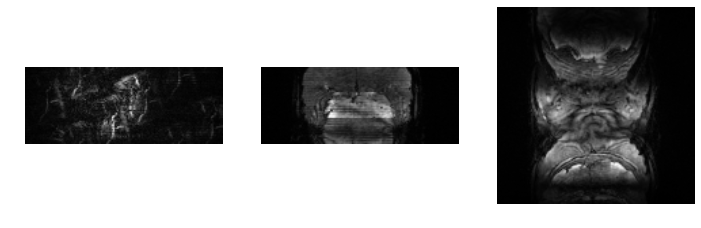

In [39]:
d2 = data[...,20]


print fname
f = plt.figure(figsize=(12,4))
slice_0 = data[24,:,:,20]
slice_1 = data[:,24,:,20]
slice_2 = data[:,:,24,20]
for i,img in enumerate([slice_0,slice_1,slice_2]):
    f.add_subplot(1,3,i+1)
    plt.imshow(img.T, cmap = 'gray', origin = 'lower')
    plt.gca().set_axis_off()

# # Find the center of the brain matrix
# ctr = np.dot(np.linalg.inv(aff), [0, 0, 0, 1])[:3]

# # Plot the data
# #     vmin, vmax = (0, 1) if data.dtype == np.int16 else (30, 150)
# vmin, vmax = (30,1200)
# plt.imshow(np.rot90(data[:, :, ctr[2] + z_idx]), 
#            cmap="gray", vmin=vmin, vmax=vmax)
# plt.gca().set_axis_off()